<h1>Computer lab 5: Monte Carlo methods</h1>
<h2>Part 1: A simple Monte carlo simulation: Throw dice</h2>



_**Monte Carlo methods** can be used to **simulate** different types of **processes** that are stochastic. Here, you will
make a simple simulation where the ‘process’ is to throw a dice
and to calculate the mean of the results._

<h4>Import libraries</h4>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

<h4>Brief Introduction</h4>

<p>
The question we will answer with a Monte Carlo method here isOne might ask the "what is the expected value (the mean) if we throw a dice with many times?". The answer is of course easy to calculate in this case, the expected value is µ = (1+2+3+4+5+6)/6 = 3.5. However, we will use this as a simple case to illustrate how a Monte Carlo method works. <br>
The principle is that we will repeat a stochastic process (=throw dice) many times, and then compute the mean of the results.
</p>
<p>
The algorithm or structure of a Monte Carlo simulation when throwing the dice $N$ times is:
</p>

    for i = 1,2,3,...,N:
       Do one stochastic simulation, a dice throw.
       result[i] = the result of the simulation
    end
    Compute mean of result

<h4>Constructing the Monte Carlo simulation</h4>
<p>
The stochastic process ’throw of a dice’ can be simulated by generating a random integer in the range $[1, 6]$. All six integers have the same probability, so this is a <b>uniform probability distribution</b>.
More precisely, we will use a <b>discrete uniform distribution</b>.
</p>
<p>
To draw samples from this distribution, we will use the built-in function <code>numpy.random.rand</code> to draw samples from a continuous uniform distribution, i.e. we get any decimal number on the interval [0, 1). From this distribution we can construct the discrete distribution {1, 2, 3, 4, 5, 6}.
</p>

<p>
To create the required discrete uniform distribution on the interval $[1, 6]$, you can use the numpy function <code>numpy.floor(x)</code>, which rounds a floating point number $x$ to the nearest integer less than $x$. The code snippet below simulates one dice throw.
</p>
<p>
Try to understand how this command works by running the cell many times and observe the output. Why is <code>numpy.floor</code> used and what does <code>floor</code> mean? Convince yourself that this code snippet generates a random number drawn from the discrete uniform distribution on the interval $[1, 6]$. The command <code>numpy.random.rand(1)</code> draws one sample from the continuous uniform distribution on the interval $[0, 1)$.</p>

In [4]:
# Run this code several times to see different dice results
y = np.floor(1 + 6 * np.random.rand(1))
print(y)

[1.]


<p>&nbsp;</p>
<p>
To solve the problem, implement the algorithm described above, and use the code dice throw code to simulate a dice throw. Start with defining the variable $N$, and end with calculation the mean (use <code>np.mean(x)</code>). Run you code for different choices of $N$, for example $N=100$, $N=500$, $N=1000$, $N=10^4$. If your code is correct the result should approach the true expected value 3.5 as $N$ gets larger.
</p>

In [5]:
# Write you Monte Carlo simulation code here
N = 100000
y = [np.floor(1 + 6 * np.random.rand(1)) for i in range(0, N)]
print(np.mean(y))


3.50291


<h4>Improving your code</h4>
<p>
It is possible to generate several random numbers at the same time using <code>numpy.random.rand</code>, without using a for-loop. To generate $N$ random numbers we can call <code>numpy.random.rand(N)</code>. This will simplify the Monte Carlo simulation code, by removing the for-loop. Update your code below. The result should be the same as before, but now without a for-loop.
</p>

In [6]:
# Write your Monte Carlo simulation without a for-loop here
N = 100000
y = np.floor(1 + 6 * np.random.rand(N))
print(np.mean(y))

3.49493


<p>
Finally, put your code in a function instead. Complete the function <code>throwDice</code> that simulates $N$ dice throws and returns a number <code>dice_mean</code>.
</p>

In [7]:
def throwDice(N):
    # enter your code here
    dice = np.floor(1 + 6 * np.random.rand(N))
    dice_mean = np.mean(y)
    return dice_mean

<p>The function you have written is a simple example of a Monte Carlo simulation. Each time you call the function, it performs one Monte Carlo simulation.</p>

<h4>Monte Carlo and the Central limit theorem</h4>
<p>Use the function <code>throwDice</code> and calculate the difference between the Monte Carlo result and the exact expected value (=3.5). Use for example $N=10^3$, $N=10^{4}$, $N=10^{5}$ and $N=10^{6}$.<br>
Intuitively, the difference between the computed mean and the exact should become smaller as we increase the number of samples ($N$). Does this hold for your results?

In [15]:
# enter your code here
N = 10000
print(throwDice(N))

3.49493


<p>
As the Monte carlo code is based on random numbers, the computed mean will differ a little each time you repeat the Monte Carlo method. One Monte Carlo simulation will lead to one specific result, and the next will be slightly different, but the results should intuitively be cenetered around 3.5.<br>
You will now investigate this by repeating the Monte Carlo simulation $M=10^{4}$ times and save the calculated mean values in a vector. This means that we perform $10^{4}$ Monte Carlo simulations, each based on $N$ dice throws.
</p>
<p>
The function <code>dice_simulation(M, N)</code> performs the idea above, and saves the different Monte carlo results in a vector, and finally plot the results in a histogram.
Call the function in the empty cell below, using 1, 5, 100, 1000, 10000 dice throws (i.e. $N$), and let $M=10^{4}$ throughout. Look at the generated histograms and try to figure out what distribution it is approaching. Also, try to understand the result when $N=1$ and how it changes when you increase $N$</p>

In [16]:
def dice_simulation(M, N):
    # vector that will be used for storing the mean values
    y_mean = np.zeros(M)

    # simulate M Monte Carlo simulations
    for i in range(0, M):
        y = np.floor(1 + 6 * np.random.rand(N))  # one Monte Carlo Simulation
        y_mean[i] = np.mean(y)

    # plot a histogram of the mean values generated by the M Monte Carlo simulations
    print("Standard deviation = ", str(np.around(np.std(y_mean), 4)))
    plt.figure(1)
    plt.hist(y_mean, bins=100)
    plt.title("Mean")
    plt.xlabel("Sample")
    plt.ylabel("Count")
    plt.show()

Standard deviation =  0.0132


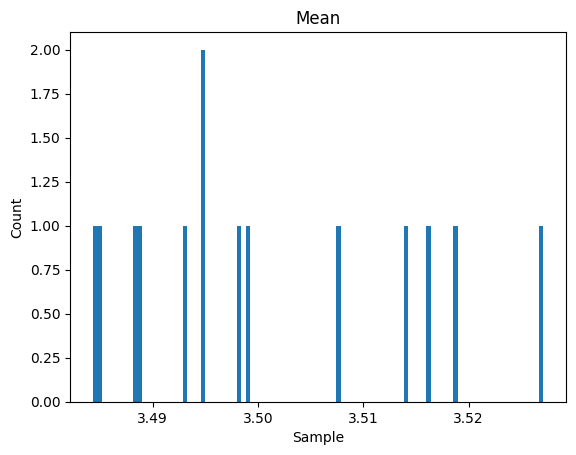

In [ ]:
# enter your code here
M = 10 ^ 4
N = 10000
dice_simulation(M, N)

<p>
What you see in these experiments is an illustration of the so-called <b>central limit theorem</b> in statistics. The theorem states that if you take an increasing number of random samples from any distribution (in this case a uniform distribution), then the distribution of the sample means will approach a normal distribution.</p>
<p>Also, When you increase the number of dice throws it approaches a normal distribution, but the distribution also gets more and more ‘narrow’, i.e. the standard deviation gets smaller. The standard deviation (or variance) is therefore a way of measuring the error in the Monte Carlo simulation.</p>